In [223]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [224]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [225]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [226]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    e = y  - np.dot(tx, w)
    loss = np.dot(e.T, e) / (2 * len(y))
    return loss

In [227]:
# Test compute_loss
w = np.array([1, 2])
compute_loss(y, tx, w)

2694.483365887078

# 2. Grid Search

Fill in the function `grid_search()` below:

In [228]:
from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            w = np.array([grid_w0[i], grid_w1[j]])
            losses[i, j] = compute_loss(y, tx, w)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=4.443009009145579, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.919 seconds


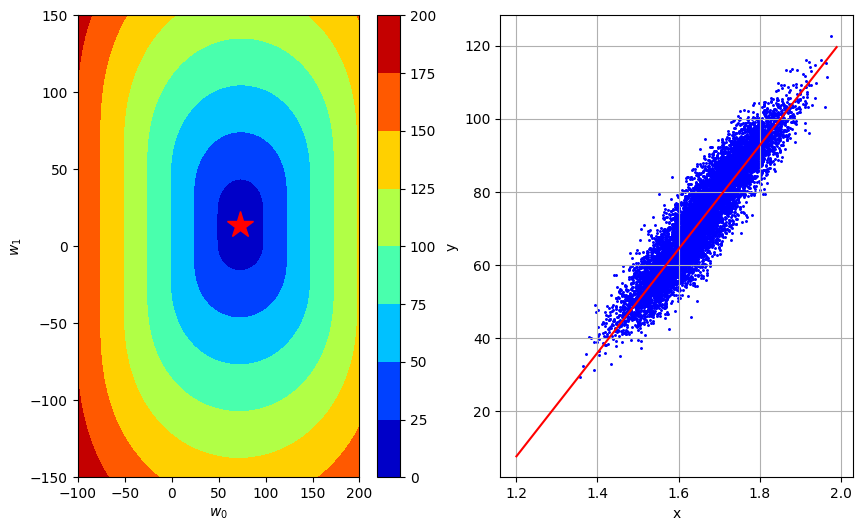

In [229]:
from grid_search import generate_w, get_best_parameters, grid_search
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [230]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************
    e = y - np.dot(tx, w)
    gradient = -np.dot(tx.T, e) / len(y)
    return gradient
    

In [231]:
# test 1
w = np.array([100, 20])
print(compute_gradient(y, tx, w))

# test 2
w = np.array([50, 10])
print(compute_gradient(y, tx, w))

[26.706078    6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [232]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [233]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=1210.7945490694617, w0=-892.6706077997898, w1=901.3479712434981
GD iter. 1/49: loss=1089.7320335556349, w0=-796.0741548196002, w1=812.561145362647
GD iter. 2/49: loss=980.7757695931908, w0=-709.1373471374294, w1=732.6530020698813
GD iter. 3/49: loss=882.7154432536324, w0=-630.8942202234758, w1=660.7356731063917
GD iter. 4/49: loss=794.461467797371, w0=-560.4754060009178, w1=596.0100770392514
GD iter. 5/49: loss=715.0330363875212, w0=-497.09847320061544, w1=537.757040578825
GD iter. 6/49: loss=643.5474481186561, w0=-440.05923368034337, w1=485.3293077644414
GD iter. 7/49: loss=579.2105864349213, w0=-388.7239181120987, w1=438.1443482314959
GD iter. 8/49: loss=521.3077048385679, w0=-342.52213410067833, w1=395.67788465184526
GD iter. 9/49: loss=469.1954759759039, w0=-300.94052849039974, w1=357.45806743015953
GD iter. 10/49: loss=422.29475065419535, w0=-263.51708344114905, w1=323.0602319306423
GD iter. 11/49: loss=380.08427728103163, w0=-229.83598289682348, w1=292.1021799

In [234]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [235]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    e = y - np.dot(tx, w)
    gradient = -np.dot(tx.T, e) / len(y)
    return gradient


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        # since we have only one minibatch, we can iterate over it only once
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            loss = compute_loss(minibatch_y, minibatch_tx, w)
            gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            w = w - gamma * gradient

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [236]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=68.80718111242173, w0=6.880718111242174, w1=-6.200647033855713
SGD iter. 1/49: loss=75.69484233030872, w0=14.450202344273045, w1=-2.7378813355788516
SGD iter. 2/49: loss=65.59586910688854, w0=21.0097892549619, w1=-3.034184344194595
SGD iter. 3/49: loss=36.18270530046449, w0=24.628059785008347, w1=-6.761701504444037
SGD iter. 4/49: loss=43.30072472759329, w0=28.958132257767677, w1=-6.640261493672092
SGD iter. 5/49: loss=30.720442511137605, w0=32.03017650888144, w1=-9.55835828611417
SGD iter. 6/49: loss=24.41238562861168, w0=34.471415071742605, w1=-11.004255896146034
SGD iter. 7/49: loss=105.39503093906455, w0=45.01091816564906, w1=18.398891205168653
SGD iter. 8/49: loss=31.81960766663321, w0=48.19287893231238, w1=16.536459011835724
SGD iter. 9/49: loss=27.506221666292973, w0=50.94350109894168, w1=18.09086373417882
SGD iter. 10/49: loss=19.201612261811846, w0=52.86366232512287, w1=17.89718103994015
SGD iter. 11/49: loss=26.25640044056815, w0=55.48930236917968, w1=17.

In [237]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [238]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [239]:
y.shape, tx.shape

((205,), (205, 2))

In [240]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([-100, 100])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=175.0960168733116, w0=-82.49778624761623, w1=90.85764065873265
GD iter. 1/49: loss=157.57154546378123, w0=-66.74579387047083, w1=82.62951725159203
GD iter. 2/49: loss=141.7995211952039, w0=-52.56900073103998, w1=75.22420618516547
GD iter. 3/49: loss=127.60469935348436, w0=-39.809886905552204, w1=68.55942622538156
GD iter. 4/49: loss=114.83202442938993, w0=-28.32668446261321, w1=62.56112426157604
GD iter. 5/49: loss=103.34882198645093, w0=-17.991802263968108, w1=57.16265249415107
GD iter. 6/49: loss=93.01393978780584, w0=-8.690408285187523, w1=52.304027903468594
GD iter. 7/49: loss=83.71254580902527, w0=-0.3191537042850019, w1=47.93126577185436
GD iter. 8/49: loss=75.34129122812276, w0=7.214975418527276, w1=43.99577985340156
GD iter. 9/49: loss=67.8071621053105, w0=13.99569162905832, w1=40.45384252679403
GD iter. 10/49: loss=61.02644589477945, w0=20.09833621853626, w1=37.26609893284725
GD iter. 11/49: loss=54.92380130530153, w0=25.590716349066412, w1=34.3971296982951

In [241]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [242]:
def compute_subgradient_mae(y, tx, w):
    """Compute the subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N, 2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # Compute the errors: e = y - tx @ w
    e = y - np.dot(tx, w)
    
    # Compute the sign of each error:
    # For e > 0, np.sign(e) = 1
    # For e < 0, np.sign(e) = -1
    # For e == 0, np.sign(e) = 0
    sign_e = np.sign(e)
    sign_e[sign_e == 0] = 1

    
    # Calculate the subgradient by taking the dot product of tx.T and sign_e,
    # then averaging across all examples by dividing by the number of data points
    gradient = np.dot(tx.T, sign_e) / len(y)
    
    return -gradient


In [243]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        gradient = compute_subgradient_mae(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        w = w - gamma * gradient
        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [244]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=75.02213752383784, w0=1.0, w1=1.972405978382839e-15
SubGD iter. 1/499: loss=74.02213752383784, w0=2.0, w1=3.944811956765678e-15
SubGD iter. 2/499: loss=73.02213752383784, w0=3.0, w1=5.917217935148517e-15
SubGD iter. 3/499: loss=72.02213752383784, w0=4.0, w1=7.889623913531356e-15
SubGD iter. 4/499: loss=71.02213752383784, w0=5.0, w1=9.862029891914195e-15
SubGD iter. 5/499: loss=70.02213752383786, w0=6.0, w1=1.1834435870297034e-14
SubGD iter. 6/499: loss=69.02213752383786, w0=7.0, w1=1.3806841848679873e-14
SubGD iter. 7/499: loss=68.02213752383786, w0=8.0, w1=1.5779247827062712e-14
SubGD iter. 8/499: loss=67.02213752383786, w0=9.0, w1=1.775165380544555e-14
SubGD iter. 9/499: loss=66.02213752383786, w0=10.0, w1=1.9724059783828387e-14
SubGD iter. 10/499: loss=65.02213752383786, w0=11.0, w1=2.1696465762211225e-14
SubGD iter. 11/499: loss=64.02213752383786, w0=12.0, w1=2.3668871740594062e-14
SubGD iter. 12/499: loss=63.022137523837856, w0=13.0, w1=2.56412777189769e-14

In [245]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [249]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            loss = compute_loss(minibatch_y, minibatch_tx, w)
            gradient = compute_subgradient_mae(minibatch_y, minibatch_tx, w)
            w = w - gamma * gradient

        # store w and loss
        ws.append(w)
        losses.append(loss)
        

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [250]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=54.42553892739938, w0=0.7, w1=-0.4411171141672126
SubSGD iter. 1/499: loss=93.00613363600779, w0=1.4, w1=0.2904685239786266
SubSGD iter. 2/499: loss=84.05622606628796, w0=2.0999999999999996, w1=0.912702049176964
SubSGD iter. 3/499: loss=82.205907482835, w0=2.8, w1=1.8526075687234762
SubSGD iter. 4/499: loss=86.1461102589445, w0=3.5, w1=2.479061544799211
SubSGD iter. 5/499: loss=85.19399729699695, w0=4.2, w1=3.633558290742007
SubSGD iter. 6/499: loss=57.12619346203136, w0=4.9, w1=3.0538472315398977
SubSGD iter. 7/499: loss=66.02858156589518, w0=5.6000000000000005, w1=2.5675818080129282
SubSGD iter. 8/499: loss=55.48300877779523, w0=6.300000000000001, w1=2.063499693536005
SubSGD iter. 9/499: loss=76.46070597167187, w0=7.000000000000001, w1=3.003405213082517
SubSGD iter. 10/499: loss=46.79753746555228, w0=7.700000000000001, w1=2.1641707521906275
SubSGD iter. 11/499: loss=60.13666528744937, w0=8.4, w1=1.8441338691314506
SubSGD iter. 12/499: loss=54.515684321359956,

In [251]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>